In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CWC23_all_innings.csv')

In [3]:
df.shape


(1437, 20)

In [4]:
df.size

28740

In [30]:
df.describe

<bound method NDFrame.describe of      team                     player bat_or_bowl  bb_bf  runs  wkts  \
0     PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1     ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2      NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3      NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4     AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   
...   ...                        ...         ...    ...   ...   ...   
1432  IND       Mohammed Shami (IND)        bowl     42    47   1.0   
1433  AUS              TM Head (AUS)        bowl     12     4   0.0   
1434  AUS             MR Marsh (AUS)        bowl     12     5   0.0   
1435  IND            RA Jadeja (IND)        bowl     60    43   0.0   
1436  IND        Kuldeep Yadav (IND)        bowl     60    56   0.0   

      wicketball_prob  runs_per_ball      opposition     ground start_date  \
0             0.05000       0.75000

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1437 non-null   object 
 1   player           1437 non-null   object 
 2   bat_or_bowl      1437 non-null   object 
 3   bb_bf            1437 non-null   int64  
 4   runs             1437 non-null   int64  
 5   wkts             574 non-null    float64
 6   wicketball_prob  1437 non-null   float64
 7   runs_per_ball    1437 non-null   float64
 8   opposition       1437 non-null   object 
 9   ground           1437 non-null   object 
 10  start_date       1437 non-null   object 
 11  overs            574 non-null    float64
 12  mdns             574 non-null    float64
 13  econ             574 non-null    float64
 14  inns             1437 non-null   int64  
 15  4s               863 non-null    float64
 16  6s               863 non-null    float64
 17  sr            

In [6]:
df_null = round(df.isna().sum()*100/len(df),2)
df_null

team                0.00
player              0.00
bat_or_bowl         0.00
bb_bf               0.00
runs                0.00
wkts               60.06
wicketball_prob     0.00
runs_per_ball       0.00
opposition          0.00
ground              0.00
start_date          0.00
overs              60.06
mdns               60.06
econ               60.06
inns                0.00
4s                 39.94
6s                 39.94
sr                 39.94
not_out            40.92
mins               39.94
dtype: float64

In [7]:
df


,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05000,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05000,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05000,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05000,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05000,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,IND,Mohammed Shami (IND),bowl,42,47,1.0,0.02381,1.119048,v Australia,Ahmedabad,19-Nov-23,7.0,1.0,6.71,2,NaN,NaN,NaN,NaN,NaN
1433,AUS,TM Head (AUS),bowl,12,4,0.0,0.00000,0.333333,v India,Ahmedabad,19-Nov-23,2.0,0.0,2.00,1,NaN,NaN,NaN,NaN,NaN
1434,AUS,MR Marsh (AUS),bowl,12,5,0.0,0.00000,0.416667,v India,Ahmedabad,19-Nov-23,2.0,0.0,2.50,1,NaN,NaN,NaN,NaN,NaN
1435,IND,RA Jadeja (IND),bowl,60,43,0.0,0.00000,0.716667,v Australia,Ahmedabad,19-Nov-23,10.0,0.0,4.30,2,NaN,NaN,NaN,NaN,NaN


In [8]:
df['opposition'].describe()


count        1437
unique         10
top       v India
freq          179
Name: opposition, dtype: object

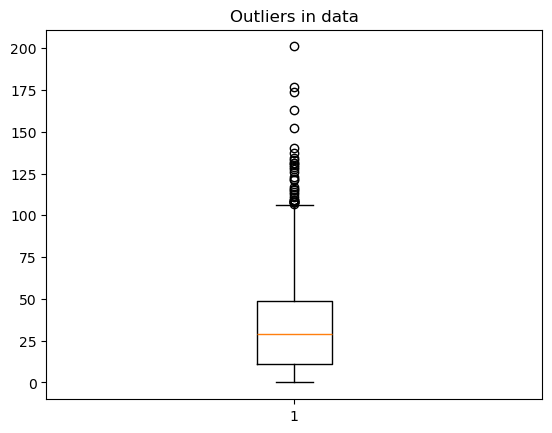

In [35]:
plt.boxplot(df['runs']);
plt.title('Outliers in data');

In [37]:
q3  = np.percentile(df['runs'],85)
q2 = np.percentile(df['runs'],25)
iqr = q3 -q2
ub = q3 +(1.5 * iqr)
lb = q2-(1.5 * iqr)

df  = df[(df['runs'] <= ub) & (df['runs'] >=lb)]

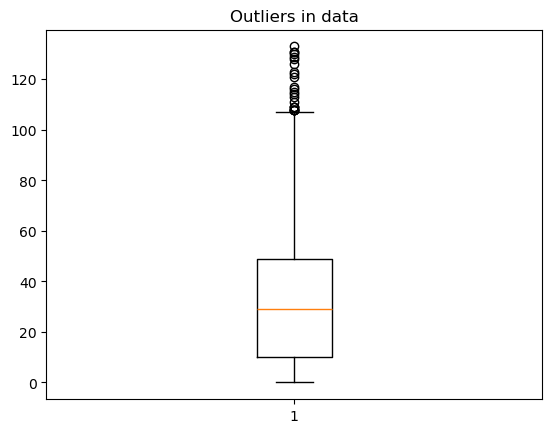

In [38]:
plt.boxplot(df['runs']);
plt.title('Outliers in data');

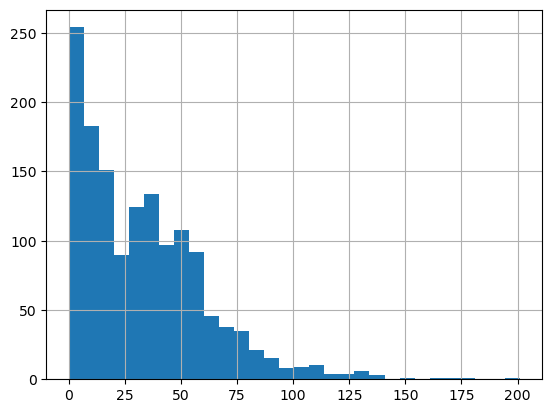

In [20]:
df['runs'].hist(bins=30)
plt.show()

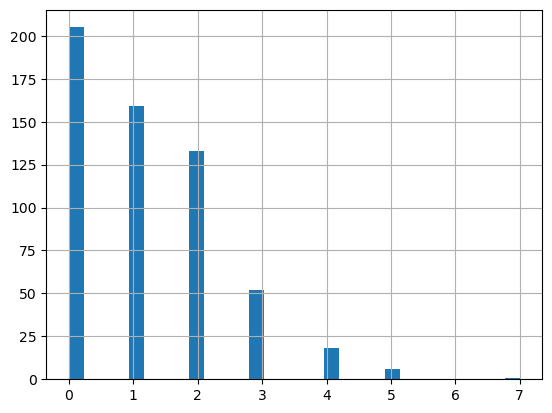

In [23]:
df['wkts'].hist(bins=30)
plt.show()

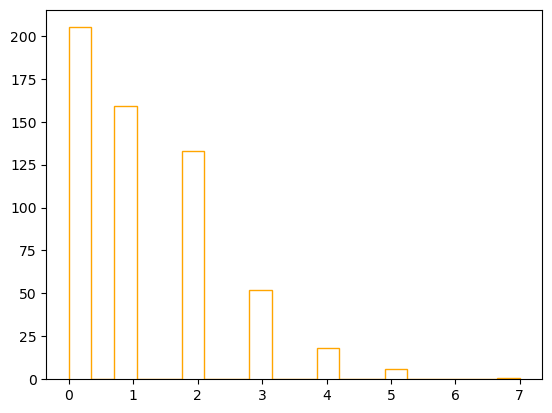

In [34]:

plt.hist(df['wkts'],histtype='step',color = 'orange',bins = 20);
